In [1]:
import xarray as xr
from teleconnections import build_confidence_mask

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
# Open lower and upper percentile files
upper = xr.open_mfdataset("/projappl/project_465000454/nurissom/AQUA/diagnostics/teleconnections/cli/output_deliverable/netcdf/teleconnections_ENSO_bootstrap_IFS-NEMO_historical-1990_lra-r100-monthly_upper.nc")
lower = xr.open_mfdataset("/projappl/project_465000454/nurissom/AQUA/diagnostics/teleconnections/cli/output_deliverable/netcdf/teleconnections_ENSO_bootstrap_IFS-NEMO_historical-1990_lra-r100-monthly_lower.nc")

In [4]:
map = xr.open_mfdataset("/projappl/project_465000454/nurissom/AQUA/diagnostics/teleconnections/cli/output_deliverable/netcdf/teleconnections_ENSO_regression_IFS-NEMO_historical-1990_lra-r100-monthly.nc")

In [5]:
build_confidence_mask?

Signature:
build_confidence_mask(
    map: xarray.core.dataarray.DataArray,
    lower: xarray.core.dataarray.DataArray,
    upper: xarray.core.dataarray.DataArray,
    mask_concordance=True,
)
Docstring:
Build the confidence masks based on the lower and upper percentiles.

Args:
    reg (xr.DataArray): Regression map of the dataset
    lower (xr.DataArray): Lower percentile map
    upper (xr.DataArray): Upper percentile map
    mask_concordance (bool): Whether to mask the concordance regions. Default is True.

Returns:
    xr.DataArray: Confidence mask
File:      /pfs/lustrep3/projappl/project_465000454/nurissom/AQUA/diagnostics/teleconnections/teleconnections/bootstrap.py
Type:      function

In [15]:
mask = build_confidence_mask(map=map, lower=lower, upper=upper, mask_concordance=True)

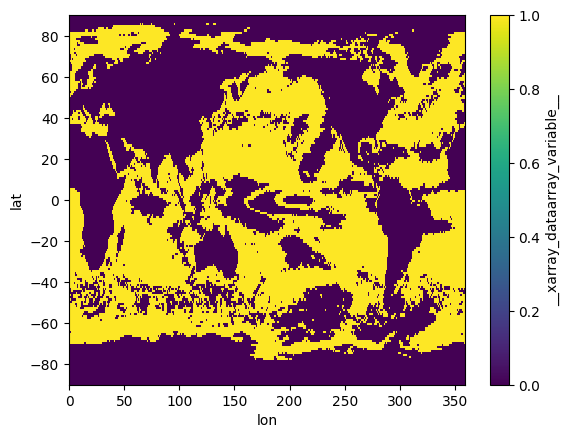

In [16]:
mask['__xarray_dataarray_variable__'].plot()

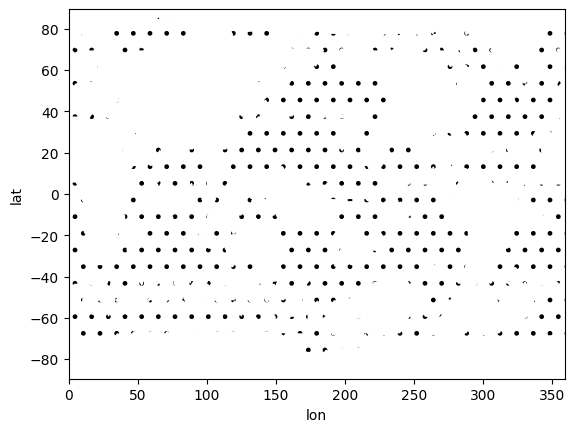

In [17]:
mask['__xarray_dataarray_variable__'].where(mask['__xarray_dataarray_variable__'] == 1).plot.contourf(levels=[0, 1], colors='none', hatches=['.', ''], add_colorbar=False)

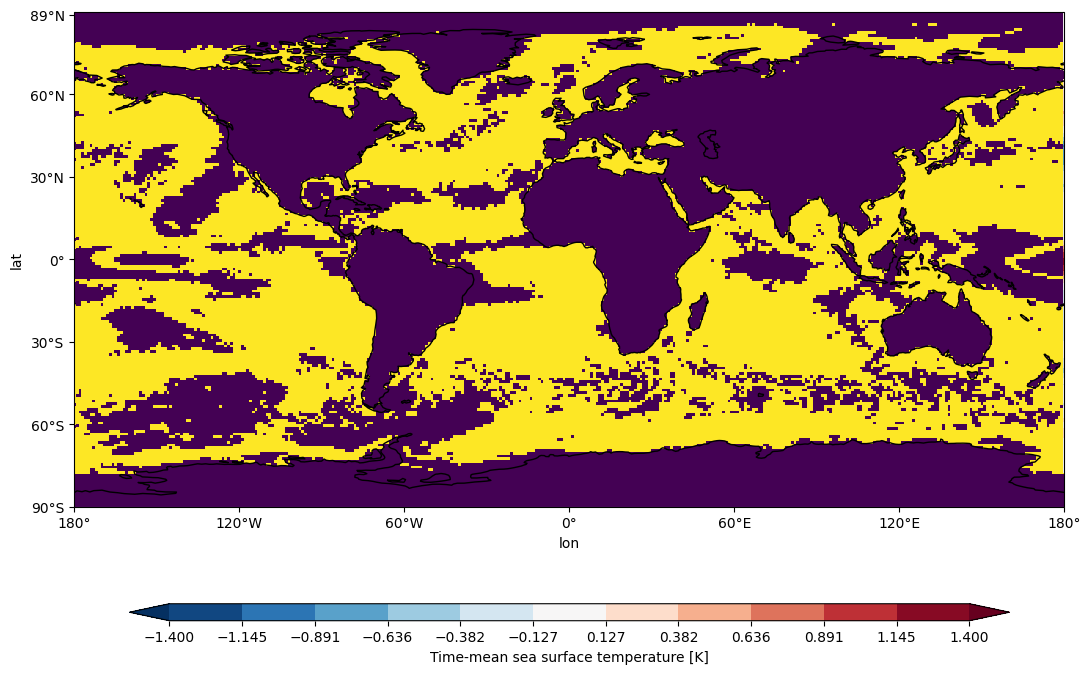

In [18]:
from aqua import plot_single_map

fig, ax = plot_single_map(map['__xarray_dataarray_variable__'], transform_first=True, return_fig=True, vmin=-1.4, vmax=1.4)

mask['__xarray_dataarray_variable__'].plot(ax=ax, add_colorbar=False)
#mask['__xarray_dataarray_variable__'].where(mask['__xarray_dataarray_variable__'] == 1).plot.contourf(levels=[0, 1], colors='none', hatches=['.', ''], add_colorbar=False, ax=ax)

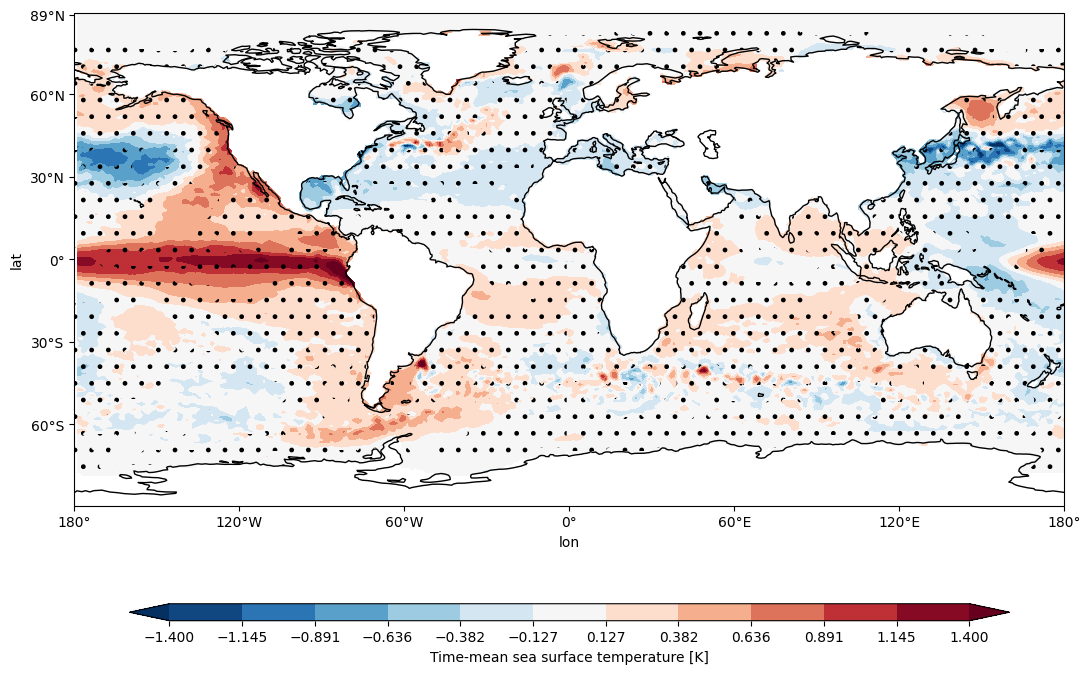

In [19]:
fig, ax = plot_single_map(map['__xarray_dataarray_variable__'], transform_first=True, return_fig=True, vmin=-1.4, vmax=1.4)

mask['__xarray_dataarray_variable__'].where(mask['__xarray_dataarray_variable__'] == 1).plot.contourf(levels=[0, 1], colors='none', hatches=['.', ''], add_colorbar=False, ax=ax)

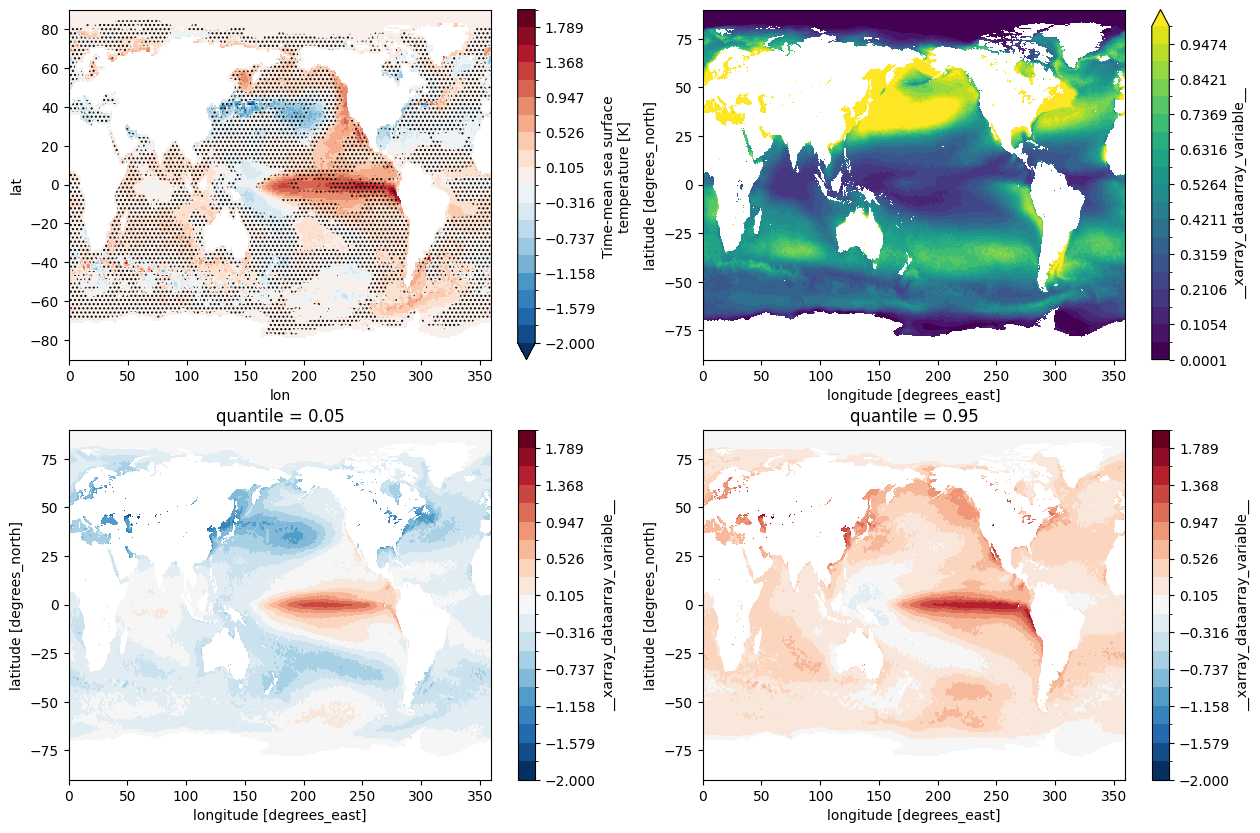

In [50]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Merge the first row subplots
# gs = axs[0, 0].get_gridspec()
# for ax in axs[0, :]:
#     ax.remove()
# #axbig = fig.add_subplot(gs[0, :])

# Plot map and mask on the first row
map['__xarray_dataarray_variable__'].plot.pcolormesh(ax=axs[0,0], vmin=-2., vmax=2., cmap='RdBu_r', levels=20)
mask['__xarray_dataarray_variable__'].where(mask['__xarray_dataarray_variable__'] == 1).plot.contourf(levels=[0, 1], colors='none', hatches=['....', ''], add_colorbar=False, ax=axs[0,0])

# Plot u-l on the first row
(upper['__xarray_dataarray_variable__'] - lower['__xarray_dataarray_variable__']).plot(ax=axs[0, 1], levels=20, vmax=1.)

# Plot lower and upper on the second row
lower['__xarray_dataarray_variable__'].plot(ax=axs[1, 0], vmin=-2., vmax=2., cmap='RdBu_r', levels=20)
upper['__xarray_dataarray_variable__'].plot(ax=axs[1, 1], vmin=-2., vmax=2., cmap='RdBu_r', levels=20)


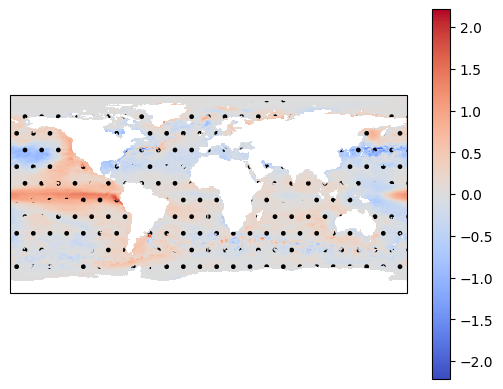

In [ ]:
# Plot reg map and mask as stippling
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
fig.

reg_plot = map['__xarray_dataarray_variable__'].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', add_colorbar=False)

# Plot mask as dots where mask is 0
mask['__xarray_dataarray_variable__'].where(mask['__xarray_dataarray_variable__'] == 1).plot.contourf(levels=[0, 1], colors='none', hatches=['.', ''], add_colorbar=False)
#mask['__xarray_dataarray_variable__'].where(mask['__xarray_dataarray_variable__'] == 1).plot.scatter(ax=ax, transform=ccrs.PlateCarree(), marker='o', linestyle='none', alpha=0.5)

fig.colorbar(reg_plot, ax=ax, orientation='vertical')

plt.show()